<div align="center"><h2>Flight Passenger Preferences and Booking Patterns: A Basis for Predictive Modeling at Horizon Airlines</h2></div>

<div align="center">
    <div style="float: right;">
        <img src="heatmap_image.png" alt="Heatmap Image" width="500"/>
    </div>
</div>


# BUSINESS UNDERSTANDING

## INTRODUCTION
Horizon Airlines, a prominent player in the aviation industry, stands as a cornerstone of reliable air travel services. As a leading airline company, Horizon Airlines is dedicated to providing safe, efficient, and seamless travel experiences for passengers across Kenya. With a fleet of modern aircraft and a commitment to operational excellence, Horizon Airlines has positioned itself as a trailblazer in the aviation sector. Recognizing the challenges and complexities inherent in managing a vast network of flights, passenger preferences, and operational logistics, Horizon Airlines has enlisted our expertise. Our team has been entrusted with the task of implementing advanced analytics to derive valuable insights from the company's extensive datasets. By harnessing the power of data-driven decision-making, our goal is to assist Horizon Airlines in optimizing its operations, enhancing customer experiences, and maintaining a competitive edge in the dynamic aviation landscape.


## PROBLEM STATEMENT
In the aftermath of the COVID-19 pandemic, the aviation industry is grappling with a multifaceted challenge to revitalize its operations and regain passenger trust. The problem revolves around understanding the intricate dynamics of customer behavior post-COVID, with a focus on influencing factors such as travel preferences, safety concerns, and the demand for additional services. It is crucial for airlines to tailor their services effectively with respect to the specific needs and concerns of passengers, utilising available data to inform effective safety measures, and streamline the provision of personalised customer preferences such as extra baggage, preferred seating, and in-flight meals. This project provides an opportunity to investigate post-pandemic travel, and guide Horizon airlines to craft strategies that align with evolving customer expectations and foster a robust recovery.

## THE MAIN OBJECTIVES

To develop a model that learns over the available customer booking data, whose inferences improve or smooth out Horizon airlines' services. 

## THE SPECIFIC OBJECTIVES

1. To improve booking conversion rates.
2. To enhance customer segmentation by identifying distinct customer segments based on booking patterns and use the information to tailor marketing strategies, services or offers to specific groups.
3. To increase ancilliary service adoption and optimize marketing or pricing strategies for these services.
4. Optimize Operational Efficiency using patterns related to flight_day and flight_hour to optimize flight schedules, staffing, and other operational aspects.
5. Improve route specific strategies.

These objectives can be interconnected, and addressing one may positively impact others.


## RESEARCH QUESTIONS

1. Booking conversion analysis:
What are the primary factors inluencing booking completion and how do the vary across different sales channels?
Can the `purchase_lead` time be optimized to improve booking conversion rates without adversely affecting other aspects? 

The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome.
Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

2. Flight duration:
Which features are most significant in trying to predict flight duration?
How do aspects such as num of passengers and length of stay relate to flight duration?

3. Customer segmentation:
What are the distinct customer segments based on booking patterns, and how do these segments differ in terms of preferences and behaviors?
How can personalized marketing strategies be developed for each identified segment?

4. Ancillary Service Adoption:
What factors drive customers to opt for extra baggage, preferred seats, or in-flight meals, and are there cross-correlations between these preferences?
Can targeted promotions or bundling strategies be implemented to increase the adoption of these services?

5. Operational Efficiency Optimization:
How do `flight_day` and f`light_hour` affect booking patterns, and how can flight schedules be optimized to match demand?
Are there specific routes (`route`) that exhibit distinct patterns in terms of demand and booking behavior?

6. Route-specific Strategies:
How do customer preferences and behaviors vary across different flight routes, and what marketing or pricing strategies can be implemented for each route?
Are there external factors, such as events or seasons, that significantly impact booking patterns on specific routes?



## DEFINING METRICS OF SUCCESS
1. Booking Conversion Rates: 
Metric: Percentage of completed bookings (`booking_complete`).
Success Criteria: Increase in overall booking conversion rates, with a target improvement percentage.

2. Flight Duration Prediction:
Metric: Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) in predicting `flight_duration`.
Success Criteria: Decrease in prediction error, indicating more accurate flight duration predictions.

3. Customer Segmentation:
Metric: Silhouette Score or Homogeneity Score for clustering quality.
Success Criteria: Improved cluster separation and cohesion, indicating well-defined customer segments.

4. Ancillary Service Adoption:
Metric: Percentage of customers opting for extra baggage, preferred seats, or in-flight meals.
Success Criteria: Increase in adoption rates for targeted ancillary services.

5. Operational Efficiency Optimization:
Metric: Percentage of flights scheduled during peak demand days.
Success Criteria: Optimization of flight schedules with an increase in the proportion of flights scheduled during peak demand times.

6. Route-specific Strategies:
Metric: Percentage increase in bookings for specific routes.
Success Criteria: Successful implementation of targeted marketing or pricing strategies leading to increased bookings on selected routes. 

8. Customer Experience Enhancement:
Metric: Customer Satisfaction Score (CSAT) based on post-travel surveys.
Success Criteria: Increase in overall CSAT scores, indicating enhanced customer experience.

Each metric aligns with the specific objectives and is measurable over time. Feedback will be used to adjust strategies or models as needed to continuously improve performance.

## DATA UNDERSTANDING

The dataset consists of 50,000 entries and comprises 15 columns. It includes both numerical and categorical features, providing insights into flight passenger preferences and booking patterns. Below is an overview of the dataset columns:

* num_passengers - Represents the number of passengers for each booking.

* sales_channel - Denotes the specific channel through which flight bookings were made.

* trip_type - Indicates the type of trip, distinguishing between one-way and round-trip bookings.

* purchase_lead - Represents the lead time (in days) between considering and making a flight purchase.

* length_of_stay - Captures the duration of the stay associated with each flight booking.

* flight_hour - Specifies the hour of the day at which the flight is scheduled.

* flight_day - Records the date of the flight booking.

* route - Describes the specific route of the flight.

* booking_origin - Indicates the origin of the booking, providing insight into the geographic source.

* wants_extra_baggage - Binary variable indicating whether passengers express a desire for additional baggage.

* wants_preferred_seat - Binary variable indicating whether passengers express a preference for specific seating.

* wants_in_flight_meals - Binary variable indicating whether passengers express a desire for in-flight meals.

* flight_duration - Captures the total duration of the flight for each booking.

* booking_complete - Binary variable indicating whether the flight booking process is completed.

## DATA PROCESSING

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier



# Set a seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline


print("Libraries imported successfully!")

Libraries imported successfully!


In [59]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The DataFrame has 50,000 rows and 14 columns. There are no missing values in our data. There are 8 integer columns for numerical values, 5 object columns for categorical variables and 1 floating point column. We start by investigating the validity of the data types with respect to column values.

In [61]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [62]:
plt.style.use("seaborn-v0_8-muted")


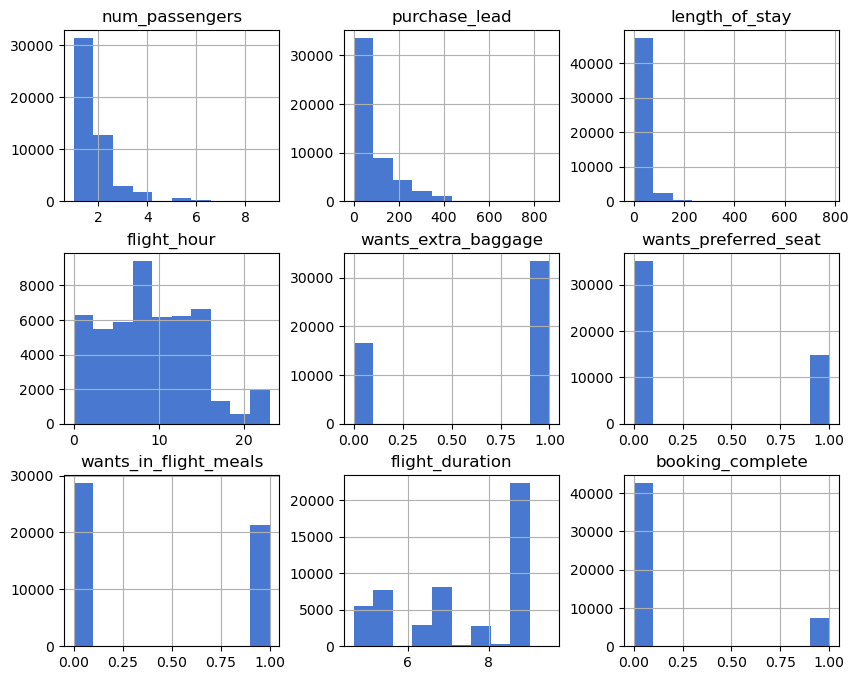

In [63]:
# Visualize the distribution of numerical variables
df.hist(figsize=(10, 8))
plt.show()


From the visualisation, the `num_passengers` column shows that the minimum number of passengers in a booking is 1, while the maximum is 9. It also shows that the majority of bookings involve a relatively small number of passengers, with occasional bookings involving larger passenger groups. The `purchase_lead` column shows that the minimum purchase lead time is 0 days, indicating bookings made on the same day as the travel date. The maximum purchase lead time is 867 days. This suggests a varied distribution of purchase lead times, with a wide range from last-minute bookings to bookings made several months in advance.
The columns `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete` are distributed into 2 specific integer values; 0 and 1, indicating that they are of boolean datatype and not integer, therefore, they shall be converted to boolean to make them categorical columns.
The `flight_hour` column shows that most flights happen early in the morning from 7:30 to 10 am. Outside of these hours, from midnight to 3pm, we have an almost even distribution of flights. These taper off as the day winds down. 


In [64]:
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols].astype('bool')

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,True,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,False,True,False
4,True,False,True,False
...,...,...,...,...
49995,True,False,True,False
49996,False,False,False,False
49997,False,False,True,False
49998,True,False,True,False


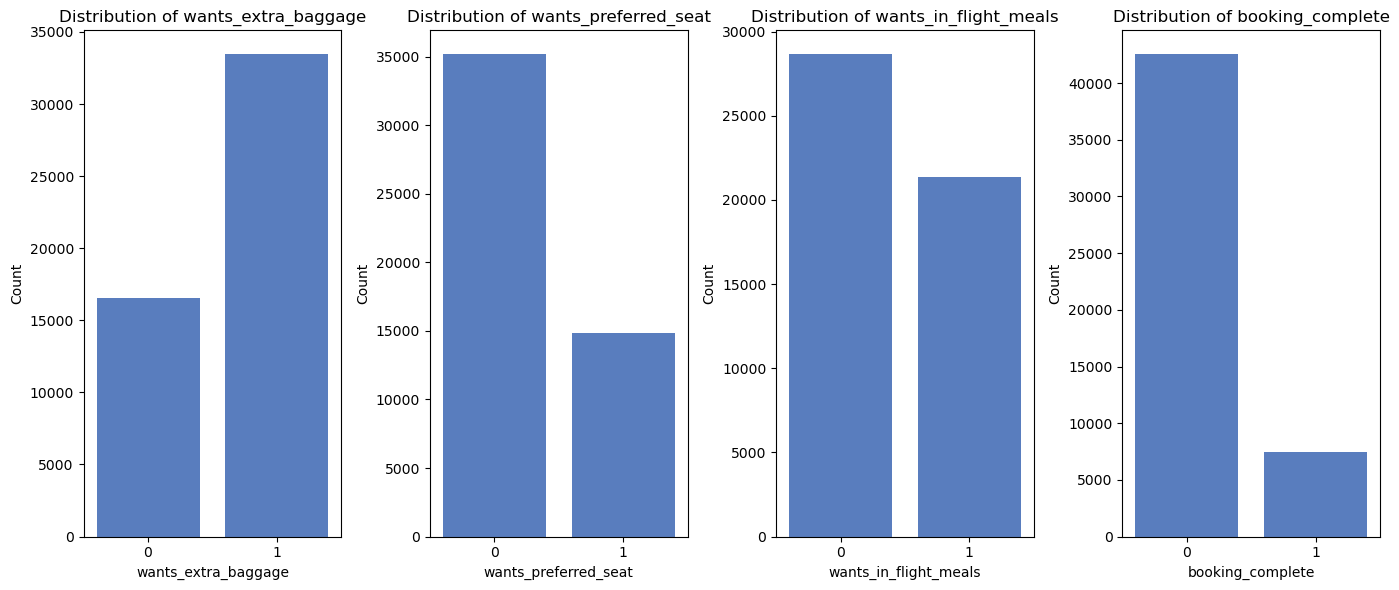

In [65]:
# Selecting only binary preference variables for distribution analysis
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]

# Create subplots for each binary preference variable
plt.figure(figsize=(14, 6))
for i, column in enumerate(binary_preferences.columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [66]:
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]
percentages = binary_preferences.mean() *  100
percentages

wants_extra_baggage      66.878
wants_preferred_seat     29.696
wants_in_flight_meals    42.714
booking_complete         14.956
dtype: float64

Approximately 67% of passengers prefer extra baggage, this is also clear from the visualization. 30% of the passengers had seats they preferred. 42% of the passengers preferred meals in flight. Only about 15% of the bookings were completed.
After evaluating the numerical columns, we investigte categorical columns of object dtype.

In [67]:
categorical_columns = ['booking_origin', 'trip_type', 'flight_day', 'route']
unique_counts = {col: df[col].nunique() for col in categorical_columns}
unique_counts

{'booking_origin': 104, 'trip_type': 3, 'flight_day': 7, 'route': 799}

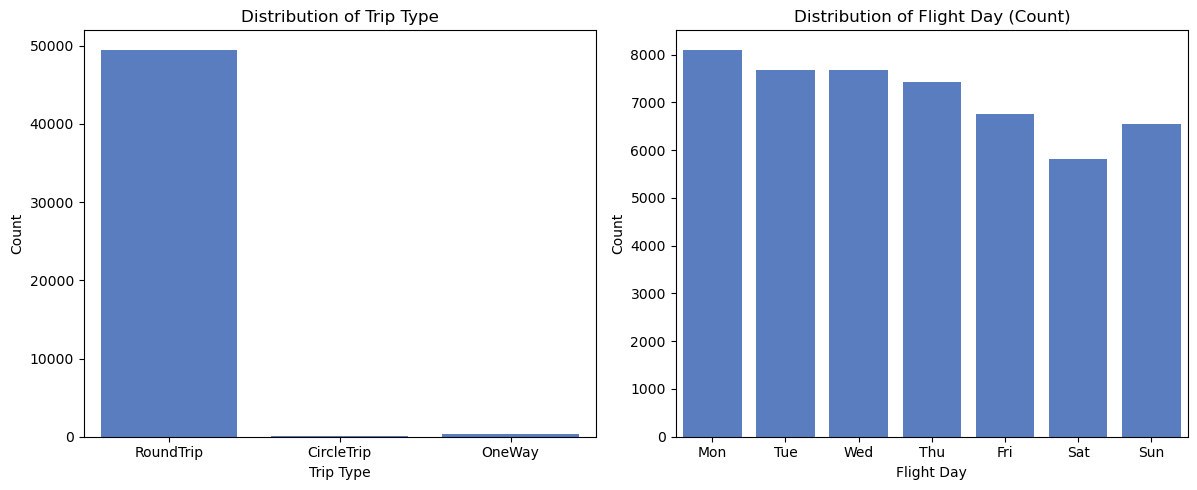

In [68]:
# Define the order of days of the week starting from Monday
ordered_days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reorder the 'flight_day' column based on the order of days of the week
df['flight_day'] = pd.Categorical(df['flight_day'], categories=ordered_days_of_week, ordered=True)

plt.figure(figsize=(18,  5))

# Plot the distribution of 'trip_type' separately
plt.subplot(1,  3,  1)
sns.countplot(x='trip_type', data=df)
plt.title('Distribution of Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')

# Plot the distribution of 'flight_day' based on counts
plt.subplot(1,  3,  2)
sns.countplot(x='flight_day', data=df, order=ordered_days_of_week)
plt.title('Distribution of Flight Day (Count)')
plt.xlabel('Flight Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [69]:
df['flight_day'].unique()

['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']

From the chart, the highest number of bookings were round trips, followed by one way trips. Circle trips which are like round-trips, except that the route on the return trip differs from the route on the outgoing trip, were least booked.



In [70]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000     

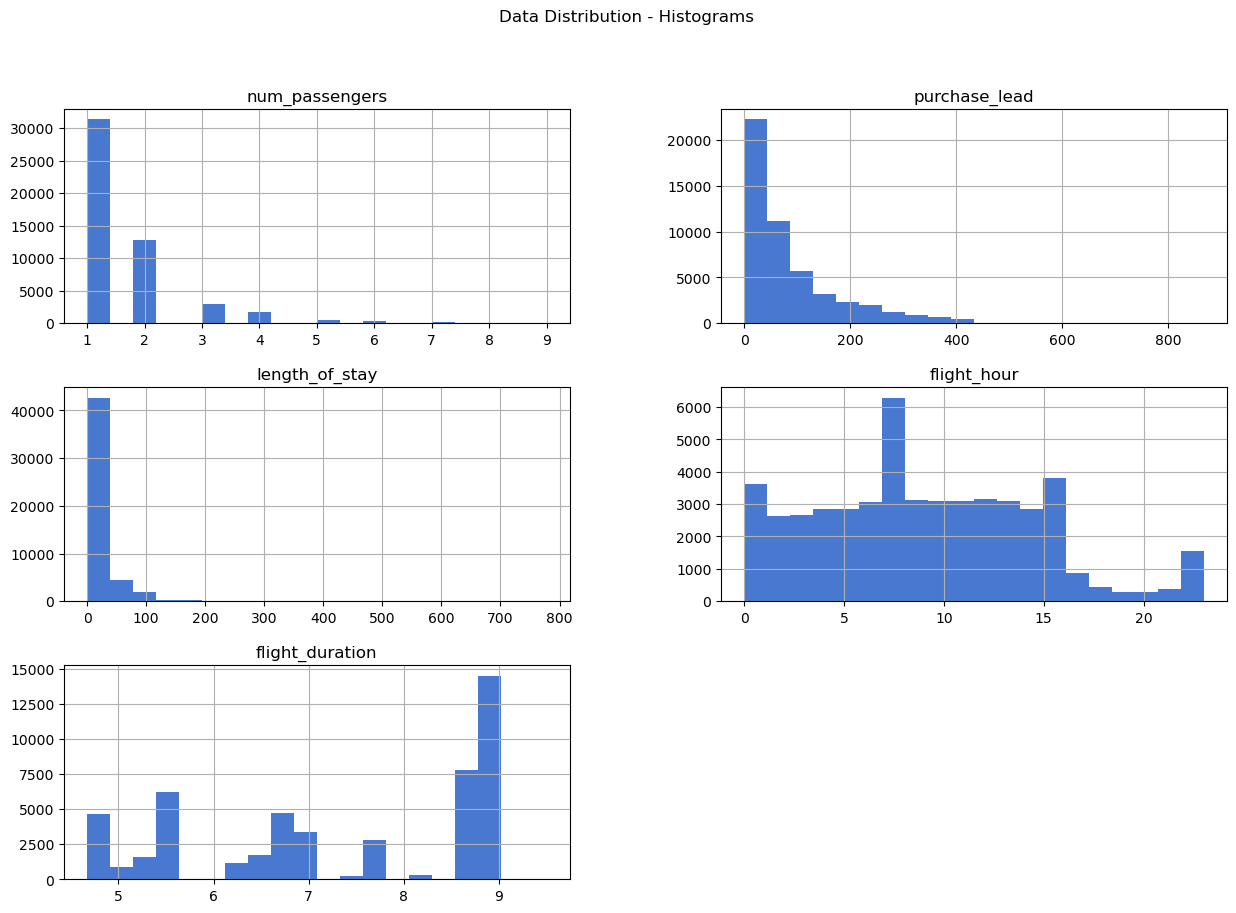

In [71]:
# Data Distribution - Histograms
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Data Distribution - Histograms")
plt.show()

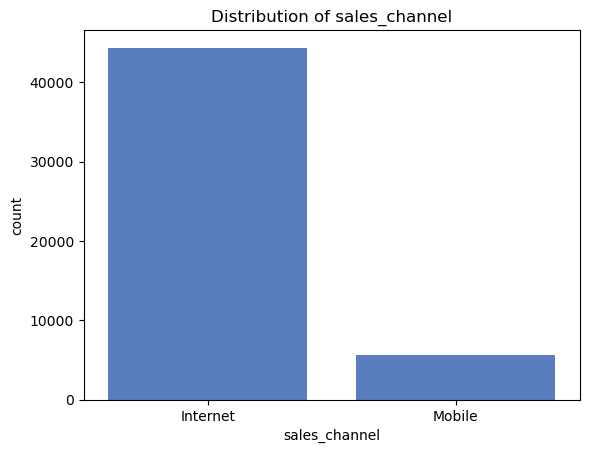

In [72]:
# Data Distribution - Categorical Variables
categorical_columns = ['sales_channel']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

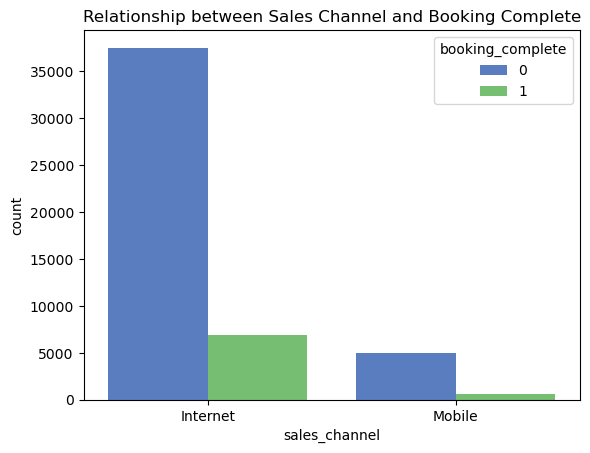

In [73]:
# Explore Relationships - Example: Sales Channel vs. Booking Complete
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title("Relationship between Sales Channel and Booking Complete")
plt.show()

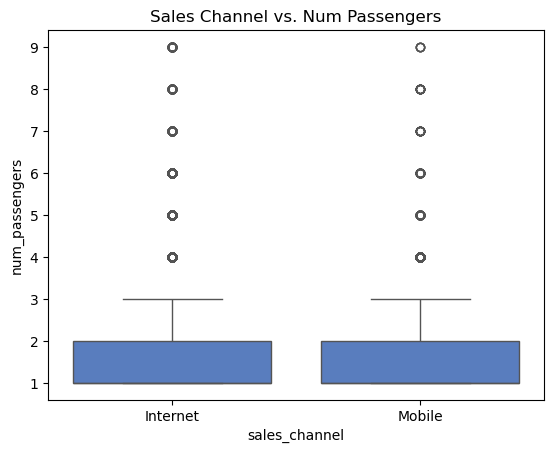

In [74]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

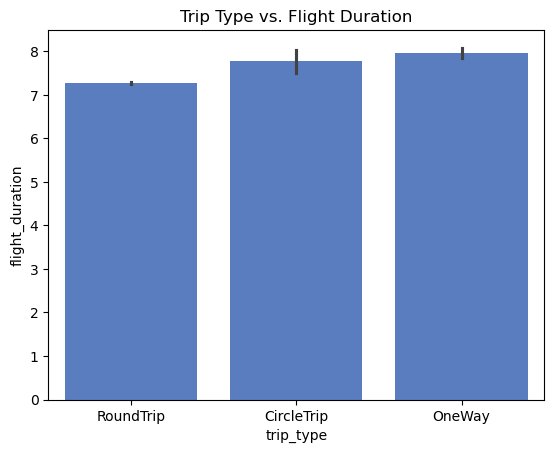

In [75]:
# Segmentation - Example: Trip Type vs. Flight Duration
sns.barplot(x='trip_type', y='flight_duration', data=df)
plt.title("Trip Type vs. Flight Duration")
plt.show()

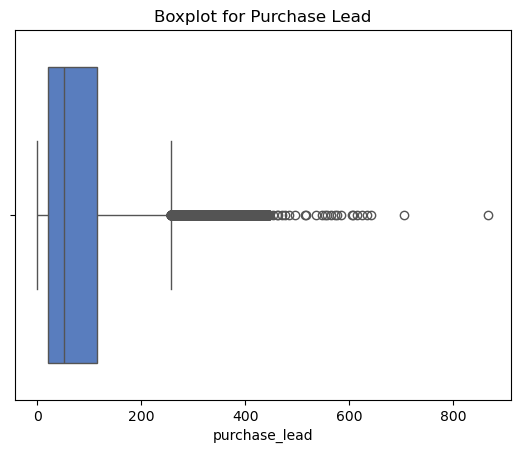

In [76]:
# Outlier Detection - Example: Boxplot for Purchase Lead
sns.boxplot(x='purchase_lead', data=df)
plt.title("Boxplot for Purchase Lead")
plt.show()

C:\Users\Pro\AppData\Local\Temp\ipykernel_18100\3704660925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.index, y=top_routes.values, palette='viridis')


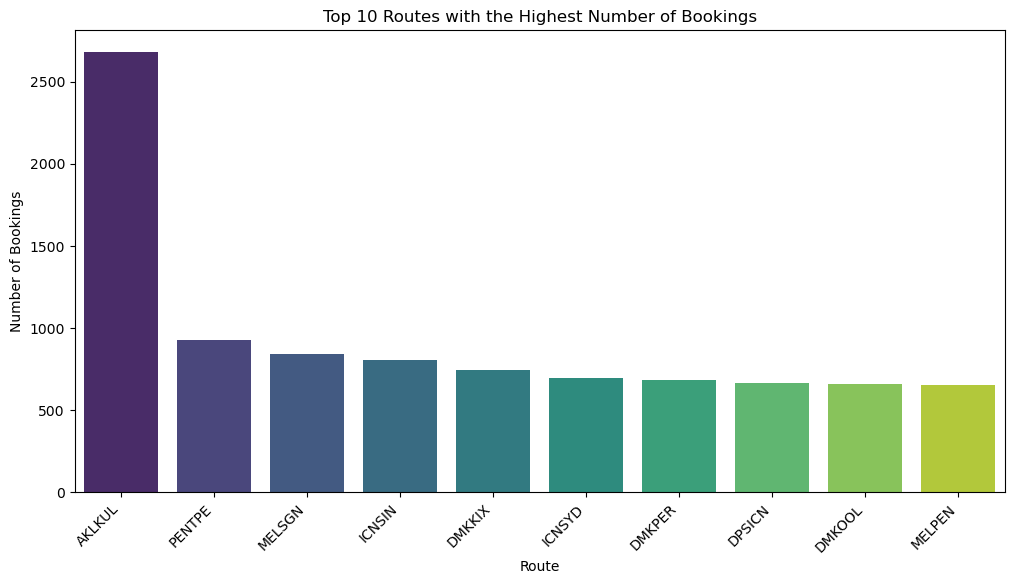

In [77]:
# Get the top 10 routes
top_routes = df['route'].value_counts().nlargest(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, palette='viridis')
plt.title('Top 10 Routes with the Highest Number of Bookings')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

From the chart, the highest number of bookings were round trips, followed by one way trips. Circle trips which are like round-trips, except that the route on the return trip differs from the route on the outgoing trip, were least booked.

Routes like "AKLKUL," "PENTPE," and "MELSGN" seem to be popular, as they have the highest number of bookings. This could indicate high demand or frequent travel between these locations.

C:\Users\Pro\AppData\Local\Temp\ipykernel_18100\3485306100.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_booking_origins.index, y=top_booking_origins.values, palette='viridis')


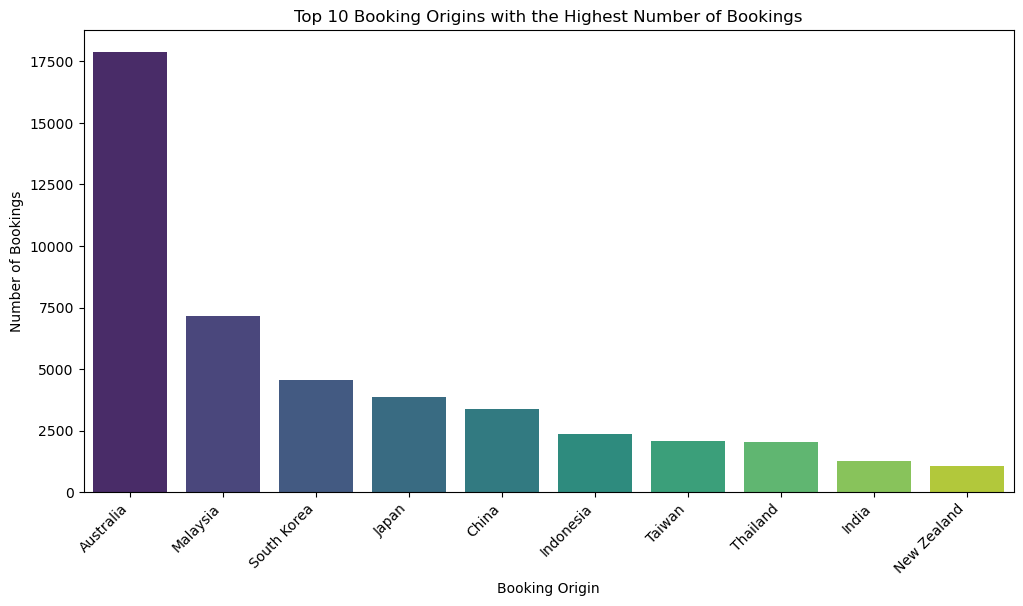

In [78]:
# Get the top 10 booking origins
top_booking_origins = df['booking_origin'].value_counts().nlargest(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_booking_origins.index, y=top_booking_origins.values, palette='viridis')
plt.title('Top 10 Booking Origins with the Highest Number of Bookings')
plt.xlabel('Booking Origin')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

Australia stands out as the top booking origin, indicating a significant number of travelers originating from or booking flights to Australia. Malaysia and South Korea follow Australia in the ranking. 

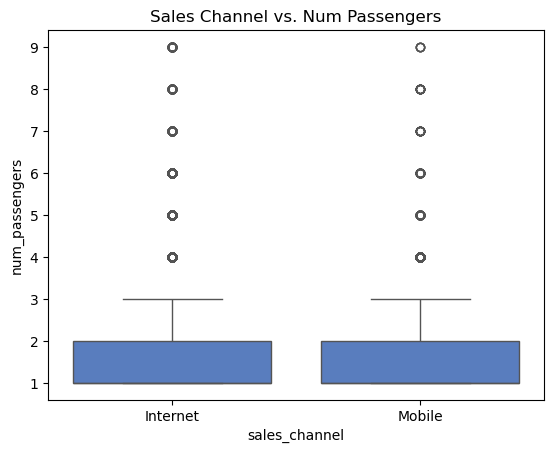

In [79]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

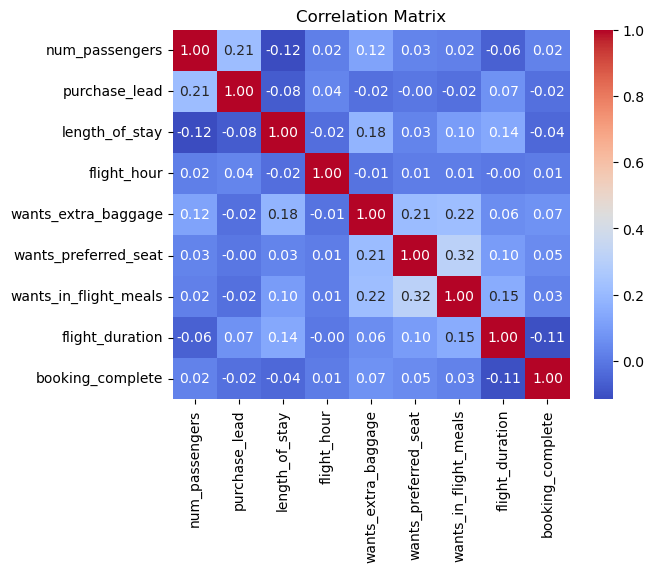

In [80]:
def corr_matrix(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    return correlation_matrix

correlation_matrix = corr_matrix(df)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

1. Given `flight_duration` is in hours, we convert `purchase_lead` and `length_of_stay` into hours too.

In [81]:
# Define conversion factors
hours_in_day = 24

# Convert time-related columns to hours
df['purchase_lead_hours'] = df['purchase_lead'] * hours_in_day
df['length_of_stay_hours'] = df['length_of_stay'] * hours_in_day

# Drop the original columns
df.drop(columns=['purchase_lead', 'length_of_stay'], inplace=True)

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0             5.52                 0   
1                      0  

We encode flight_day as integers representing the 7 days of the week. 

In [82]:
# Define the mapping of days to integers
day_mapping = {'Mon': 1.0, 'Tue': 2.0, 'Wed': 3.0, 'Thu': 4.0, 'Fri': 5.0, 'Sat': 6.0, 'Sun': 7.0}

# Map the 'flight_day' column using the day_mapping dictionary
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Verify that the encoding matches the defined mapping
print(df[['flight_day', 'flight_day_encoded']].sample(6))
# Create 'is_weekend_flight' feature based on 'flight_day'

df['is_weekend_flight'] = df['flight_day_encoded'].apply(lambda x:  1 if x >=  6 else  0)

      flight_day flight_day_encoded
33553        Thu                4.0
9427         Mon                1.0
199          Mon                1.0
12447        Mon                1.0
39489        Thu                4.0
42724        Wed                3.0


2. Binning

In [83]:
def categorize_time_of_day(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Convert integer values to string representations of time
df['flight_hour_str'] = df['flight_hour'].astype(str)

# Apply categorize_time_of_day function
df['time_of_day_preference'] = df['flight_hour_str'].apply(categorize_time_of_day)

# Drop after use
df.drop(columns=['flight_hour_str'], inplace=True)

Create buckets for 'length_of_stay_hours', 'flight_duration' and 'purchase_lead_hours' to categorize stays into short, medium, long, etc. This can help simplify the model and potentially reveal patterns related to stay durations.

Also create buckets based on time period such as weeks and months.

In [84]:
def bin_column(data, num_bins, labels):
    # Use pd.qcut() to bin the column
    binned_column = pd.qcut(data, q=num_bins, labels=labels)
    return binned_column

# define quantiles
num_bins =  3
labels = ['Short', 'Medium', 'Long']
column_= ['length_of_stay_hours', 'purchase_lead_hours', 'flight_duration']

# Create new binned columns for each duration column
for col in column_:
    # Apply bin_column function to create binned column
    df[col + '_binned'] = bin_column(df[col], num_bins, labels)

# Display the DataFrame with new binned columns
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0             5.52                 0   
1                      0  

3. Deriving more insightful features from existing features

Create interaction features by combining related variables. For example, we can create features like "wants_extra_baggage_and_preferred_seat" or "wants_meals_and_preferred_seat" to capture combinations of customer preferences. simply multiply the boolean columns representing individual preferences. This will result in a new binary column where a value of 1 indicates that both preferences are true, and a value of 0 indicates that at least one preference is false.

In [85]:
# Create new features for combinations of customer preferences
df['wants_extra_baggage_and_preferred_seat'] = df['wants_extra_baggage'] & df['wants_preferred_seat']
df['wants_meals_and_preferred_seat'] = df['wants_in_flight_meals'] & df['wants_preferred_seat']
df['wants_extra_baggage_and_meals'] = df['wants_extra_baggage'] & df['wants_in_flight_meals']
df['wants_all_services'] = df['wants_extra_baggage'] & df['wants_preferred_seat'] & df['wants_in_flight_meals']
df['wants_seat_and_meals_but_no_baggage'] = (df['wants_preferred_seat'] & df['wants_in_flight_meals']) & ~df['wants_extra_baggage']
df['wants_baggage_and_meals_but_no_seat'] = (df['wants_extra_baggage'] & df['wants_in_flight_meals']) & ~df['wants_preferred_seat']
df['wants_baggage_and_seat_but_no_meals'] = (df['wants_extra_baggage'] & df['wants_preferred_seat']) & ~df['wants_in_flight_meals']

5. Columns building using aggregate statistics

In [86]:
df[bool_cols] = df[bool_cols].astype('int')

df['total_preferences'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,time_of_day_preference,length_of_stay_hours_binned,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6288,456,6.0,1,Morning,Medium,Long,Short,0,0,0,0,0,0,0,1
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,2688,480,6.0,1,Evening,Medium,Long,Short,0,0,0,0,0,0,0,0
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,5.52,0,5832,528,3.0,0,Afternoon,Medium,Long,Short,1,0,0,0,0,0,1,2
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,2304,744,6.0,1,Evening,Long,Long,Short,0,0,0,0,0,0,0,1
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,5.52,0,1632,528,3.0,0,Afternoon,Medium,Medium,Short,0,0,1,0,0,1,0,2


In [87]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by sales_channel
agg_sales = df.groupby('sales_channel').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_sales.columns = ['sales_channel', 'avg_purchase_lead_sales', 'std_purchase_lead_sales', 'avg_length_of_stay_sales', 'std_length_of_stay_sales']

df = pd.merge(df, agg_sales, on='sales_channel', how='left')
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,time_of_day_preference,length_of_stay_hours_binned,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6288,456,6.0,1,Morning,Medium,Long,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,2688,480,6.0,1,Evening,Medium,Long,Short,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,5.52,0,5832,528,3.0,0,Afternoon,Medium,Long,Short,1,0,0,0,0,0,1,2,2048.920373,2173.450504,570.532919,828.813233
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,2304,744,6.0,1,Evening,Long,Long,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,5.52,0,1632,528,3.0,0,Afternoon,Medium,Medium,Short,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233


In [88]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by trip_type
agg_trip = df.groupby('trip_type').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_trip.columns = ['trip_type', 'avg_purchase_lead_trip', 'std_purchase_lead_trip', 'avg_length_of_stay_trip', 'std_length_of_stay_trip']

df = pd.merge(df, agg_trip, on='trip_type', how='left')
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,time_of_day_preference,length_of_stay_hours_binned,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6288,456,6.0,1,Morning,Medium,Long,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,2688,480,6.0,1,Evening,Medium,Long,Short,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,5.52,0,5832,528,3.0,0,Afternoon,Medium,Long,Short,1,0,0,0,0,0,1,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,2304,744,6.0,1,Evening,Long,Long,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,5.52,0,1632,528,3.0,0,Afternoon,Medium,Medium,Short,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874


In [89]:
df.dtypes

num_passengers                               int64
sales_channel                               object
trip_type                                   object
flight_hour                                  int64
flight_day                                category
route                                       object
booking_origin                              object
wants_extra_baggage                          int32
wants_preferred_seat                         int32
wants_in_flight_meals                        int32
flight_duration                            float64
booking_complete                             int32
purchase_lead_hours                          int64
length_of_stay_hours                         int64
flight_day_encoded                        category
is_weekend_flight                            int64
time_of_day_preference                      object
length_of_stay_hours_binned               category
purchase_lead_hours_binned                category
flight_duration_binned         

Compute the variance for 'flight_duration' within each group defined by 'route'. 

In [90]:
# Group by 'route' and compute the variance of 'flight_duration'
variance_flight_duration_by_route = df.groupby('route')['flight_duration'].var().reset_index()
variance_flight_duration_by_route.columns = ['route', 'variance_flight_duration_by_route']

# Group by 'booking_origin' and compute the variance of 'flight_duration'
variance_flight_duration_by_origin = df.groupby('booking_origin')['flight_duration'].var().reset_index()
variance_flight_duration_by_origin.columns = ['booking_origin', 'variance_flight_duration_by_origin']

# Merge the variance results for 'route' back to the original DataFrame
df = pd.merge(df, variance_flight_duration_by_route, on='route', how='left')

# Merge the variance results for 'booking_origin' back to the original DataFrame
df = pd.merge(df, variance_flight_duration_by_origin, on='booking_origin', how='left')


Since 'flight_day_encoded' is a categorical variable we can not compute variance. Instead, we compute the mode or frequency distribution for 'flight_day_encoded' within each group.

In [91]:
# Group by 'route' and compute the mode of 'flight_day_encoded'
mode_flight_day_by_route = df.groupby('route')['flight_day_encoded'].agg(lambda x: x.mode()[0]).reset_index()
mode_flight_day_by_route.columns = ['route', 'mode_flight_day_by_route']

# Group by 'booking_origin' and compute the mode of 'flight_day_encoded'
mode_flight_day_by_origin = df.groupby('booking_origin')['flight_day_encoded'].agg(lambda x: x.mode()[0]).reset_index()
mode_flight_day_by_origin.columns = ['booking_origin', 'mode_flight_day_by_origin']

# Merge the mode results for 'route' back to the original DataFrame
df = pd.merge(df, mode_flight_day_by_route, on='route', how='left')

# Merge the mode results for 'booking_origin' back to the original DataFrame
df = pd.merge(df, mode_flight_day_by_origin, on='booking_origin', how='left')


In [92]:
df.dtypes

num_passengers                               int64
sales_channel                               object
trip_type                                   object
flight_hour                                  int64
flight_day                                category
route                                       object
booking_origin                              object
wants_extra_baggage                          int32
wants_preferred_seat                         int32
wants_in_flight_meals                        int32
flight_duration                            float64
booking_complete                             int32
purchase_lead_hours                          int64
length_of_stay_hours                         int64
flight_day_encoded                        category
is_weekend_flight                            int64
time_of_day_preference                      object
length_of_stay_hours_binned               category
purchase_lead_hours_binned                category
flight_duration_binned         

In [93]:
df['mode_flight_day_by_origin'].sample(10)

44474    7.0
2449     3.0
8387     1.0
2787     1.0
21906    1.0
13020    1.0
20258    1.0
17584    3.0
31596    1.0
29746    1.0
Name: mode_flight_day_by_origin, dtype: category
Categories (7, float64): [1.0 < 2.0 < 3.0 < 4.0 < 5.0 < 6.0 < 7.0]

6. More airport data to help improve model inference.

In [94]:
import airportsdata

# Load the airport data using the IATA code as the key
airports = airportsdata.load('IATA')

# Function to retrieve airport information for an airport code
def get_airport_info(airport_code):
    airport_info = airports.get(airport_code)
    if airport_info:
        return {
            'latitude': airport_info['lat'],
            'longitude': airport_info['lon'],
            'city': airport_info['city'],
            'timezone': airport_info['tz']
        }
    else:
        return None  # Return None if data is not found for the airport code

# Iterate over rows in the dataframe and retrieve airport information for each airport code
for index, row in df.iterrows():
    origin_code = row['route'][:3]
    dest_code = row['route'][3:]
    
    origin_info = get_airport_info(origin_code)
    dest_info = get_airport_info(dest_code)
    
    if origin_info:
        df.at[index, 'origin_latitude'] = origin_info['latitude']
        df.at[index, 'origin_longitude'] = origin_info['longitude']
        df.at[index, 'origin_city'] = origin_info['city']
        df.at[index, 'origin_timezone'] = origin_info['timezone']
    
    if dest_info:
        df.at[index, 'dest_latitude'] = dest_info['latitude']
        df.at[index, 'dest_longitude'] = dest_info['longitude']
        df.at[index, 'dest_city'] = dest_info['city']
        df.at[index, 'dest_timezone'] = dest_info['timezone']# Define the mapping of days to integers
day_mapping = {'Mon': 1.0, 'Tue': 2.0, 'Wed': 3.0, 'Thu': 4.0, 'Fri': 5.0, 'Sat': 6.0, 'Sun': 7.0}

# Map the 'flight_day' column using the day_mapping dictionary
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Verify that the encoding matches the defined mapping
print(df[['flight_day', 'flight_day_encoded']].sample(6))
# Create 'is_weekend_flight' feature based on 'flight_day'

df['is_weekend_flight'] = df['flight_day_encoded'].apply(lambda x:  1 if x >=  6 else  0)

      flight_day flight_day_encoded
11212        Mon                1.0
8613         Thu                4.0
32089        Mon                1.0
36941        Mon                1.0
29907        Mon                1.0
22703        Sun                7.0


Now that we have latitude and longitude, we calculate distances.
- *Euclidean distance* is the straight-line distance between two points in a two-dimensional space, such as a Cartesian coordinate system. When applied to geographical data, it treats the Earth's surface as a flat plane, which can lead to inaccuracies, especially for long distances. 
- *Great Circle distance*, also known as orthodromic distance, is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (i.e., the Earth). It takes into account the curvature of the Earth, representing the shortest path between two points along the surface of the Earth. Great Circle distance is more accurate for calculating distances over long distances, especially when considering travel routes on the Earth's surface.

In [95]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate euclidean distance

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# Function to calculate great circle distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate the change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Use Haversine formula to calculate distance
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Calculate Euclidean Distance
df['euclidean_distance'] = euclidean_distance(df['origin_latitude'], df['origin_longitude'], 
                                               df['dest_latitude'], df['dest_longitude'])

# Calculate Great Circle Distance (Haversine Distance)
df['great_circle_distance'] = df.apply(lambda row: haversine_distance(row['origin_latitude'], row['origin_longitude'],
                                                                     row['dest_latitude'], row['dest_longitude']),
                                       axis=1)


In [96]:
print(df[['origin_city', 'booking_origin', 'dest_city', 'route', 'trip_type']].sample(10))

               origin_city booking_origin      dest_city   route  trip_type
17973            Kathmandu      Australia         Sydney  KTMSYD  RoundTrip
15124               Tehran      Australia         Sydney  IKASYD  RoundTrip
36593            New Delhi          Japan          Osaka  DELKIX  RoundTrip
40579             Langkawi         Taiwan         Taipei  LGKTPE  RoundTrip
13941                Seoul      Australia     Gold Coast  ICNOOL  RoundTrip
34247               Penang          China       Shanghai  PENPVG  RoundTrip
43882  Chitose / Tomakomai       Thailand        Bangkok  CTSDMK  RoundTrip
8207             New Delhi          India      Melbourne  DELMEL  RoundTrip
20954            Melbourne      Australia  Visakhapatnam  MELVTZ  RoundTrip
42877        Kota Kinabalu    South Korea          Busan  BKIPUS  RoundTrip


Analyse data on the frequency of flights between origin and destination airports. This can indicate the popularity and demand for specific routes, which may affect booking completion rates.

In [97]:
# Count the number of flights for each unique pair of 'origin_city' and 'dest_city'
flight_counts = df.groupby(['origin_city', 'dest_city']).size().reset_index(name='flight_count')

# Display the top N most frequent flight routes
top_flight_routes = flight_counts.nlargest(10, 'flight_count')
print(top_flight_routes)


              origin_city         dest_city  flight_count
12               Auckland      Kuala Lumpur          2680
600                Penang            Taipei           924
503             Melbourne  Ho Chi Minh City           842
692                 Seoul         Singapore           801
58                Bangkok             Osaka           744
694                 Seoul            Sydney           695
59                Bangkok             Perth           679
234  Denpasar-Bali Island             Seoul           666
54                Bangkok        Gold Coast           655
508             Melbourne            Penang           649


In [98]:
## Plot the heatmap without labels, title, or annotations
#plt.figure(figsize=(19,  15))
#sns.heatmap(flight_counts_pivot, mask=mask, cmap="inferno", linewidths=.5, annot=False)

# # Remove axis labels
# plt.xlabel('')
# plt.ylabel('')

# # Remove ticks
# plt.xticks([])
# plt.yticks([])

# # Save the plot as an image without any additional text
# plt.savefig('heatmap_image.png', bbox_inches='tight', pad_inches=0)

# # Display the plot
# plt.show()


In [99]:
# Group by 'route' and calculate the sum of 'booking_complete' and the mean of 'flight_duration'
route_summary = df.groupby('route').agg({'booking_complete': 'sum', 'flight_duration': 'mean'})

# Calculate the weighted booking completion rate for each route
route_summary['weighted_booking_completion_rate'] = route_summary['booking_complete'] * route_summary['flight_duration']

# Define the number of top routes to return
top_n =   10

# Sort the DataFrame by 'weighted_booking_completion_rate' in descending order and select the top N rows
top_routes = route_summary.sort_values(by='weighted_booking_completion_rate', ascending=False).head(top_n)

# Display the top N routes
print(top_routes)


        booking_complete  flight_duration  weighted_booking_completion_rate
route                                                                      
AKLKUL               567             8.83                           5006.61
PENTPE               401             4.67                           1872.67
DMKKIX               187             7.00                           1309.00
MELPEN               137             8.83                           1209.71
ICNPEN               135             6.62                            893.70
CTSDMK                95             8.67                            823.65
CGKHND               105             7.57                            794.85
JHBKTM               164             4.75                            779.00
HNDPEN                98             7.57                            741.86
CGKKIX                96             7.00                            672.00


In [100]:
complete_bookings_subset = df[df['booking_complete'] == True]

complete_bookings_subset.sample(8)

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,time_of_day_preference,length_of_stay_hours_binned,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip,variance_flight_duration_by_route,variance_flight_duration_by_origin,mode_flight_day_by_route,mode_flight_day_by_origin,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
28546,1,Internet,RoundTrip,6,Wed,KIXSUB,Japan,1,0,0,7.00,1,168,72,3.0,0,Morning,Short,Short,Medium,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.324391,6.0,7.0,34.42730,135.24400,Osaka,Asia/Tokyo,-7.37983,112.787,Surabaya,Asia/Jakarta,47.456854,5214.286625
1356,2,Internet,RoundTrip,12,Wed,AKLKUL,Switzerland,1,0,1,8.83,1,5952,816,3.0,0,Afternoon,Long,Long,Long,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.922464,7.0,4.0,-37.00810,174.79201,Auckland,Pacific/Auckland,2.74558,101.710,Kuala Lumpur,Asia/Kuala_Lumpur,83.194563,8703.353672
22959,1,Internet,RoundTrip,12,Mon,PENTPE,Taiwan,1,1,0,4.67,1,3000,1248,1.0,0,Afternoon,Long,Long,Short,1,0,0,0,0,0,1,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,3.171768,2.0,1.0,5.29714,100.27700,Penang,Asia/Kuala_Lumpur,25.07770,121.233,Taipei,Asia/Taipei,28.817087,3135.176366
21799,2,Internet,RoundTrip,7,Sun,OOLSGN,Australia,1,0,1,8.83,1,600,1848,7.0,1,Morning,Long,Short,Long,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.748135,4.0,1.0,-28.16440,153.50500,Gold Coast,Australia/Brisbane,10.81880,106.652,Ho Chi Minh City,Asia/Ho_Chi_Minh,60.949926,6645.275252
27470,1,Internet,RoundTrip,14,Sat,DPSPVG,China,0,0,0,5.33,1,1464,72,6.0,1,Afternoon,Short,Medium,Short,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.293775,4.0,1.0,-8.74817,115.16700,Denpasar-Bali Island,Asia/Makassar,31.14340,121.805,Shanghai,Asia/Shanghai,40.440084,4491.779154
22826,2,Internet,RoundTrip,1,Sat,PENSYD,Australia,1,0,1,8.58,1,840,504,6.0,1,Evening,Medium,Medium,Medium,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.748135,3.0,1.0,5.29714,100.27700,Penang,Asia/Kuala_Lumpur,-33.94610,151.177,Sydney,Australia/Sydney,64.271626,6894.616577
49967,3,Internet,RoundTrip,13,Fri,PENTPE,Malaysia,1,0,0,4.67,1,6696,144,5.0,0,Afternoon,Medium,Long,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.938638,2.0,3.0,5.29714,100.27700,Penang,Asia/Kuala_Lumpur,25.07770,121.233,Taipei,Asia/Taipei,28.817087,3135.176366
25839,1,Internet,RoundTrip,0,Thu,DMKHND,Thailand,0,0,0,7.57,1,48,48,4.0,0,Evening,Short,Short,Medium,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.310104,4.0,7.0,13.91260,100.60700,Bangkok,Asia/Bangkok,35.55230,139.780,Tokyo,Asia/Tokyo,44.752660,4584.990753


In [101]:
trip_type_counts = complete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

trip_type
RoundTrip     7453
OneWay          20
CircleTrip       5
Name: count, dtype: int64


In [102]:
incomplete_bookings_subset = df[df['booking_complete'] != True]
incomplete_bookings_subset.sample(6)

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,time_of_day_preference,length_of_stay_hours_binned,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip,variance_flight_duration_by_route,variance_flight_duration_by_origin,mode_flight_day_by_route,mode_flight_day_by_origin,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
43582,1,Internet,CircleTrip,11,Mon,CMBMEL,Australia,1,1,1,8.83,0,288,144,1.0,0,Morning,Medium,Short,Long,1,1,1,1,0,0,0,3,2048.920373,2173.450504,570.532919,828.813233,2287.034483,2135.710426,605.37931,830.046386,0.0,1.748135,3.0,1.0,7.18076,79.8841,Colombo,Asia/Colombo,-37.6733,144.8430,Melbourne,Australia/Melbourne,78.940138,8358.219658
14241,2,Internet,RoundTrip,0,Thu,ICNPER,South Korea,0,0,0,6.62,0,1872,1968,4.0,0,Evening,Long,Medium,Short,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.653680,1.0,1.0,37.46910,126.4510,Seoul,Asia/Seoul,-31.9403,115.9670,Perth,Australia/Perth,70.196717,7794.326304
22335,1,Internet,RoundTrip,21,Thu,PEKSYD,Mexico,1,0,0,8.58,0,2952,4392,4.0,0,Evening,Long,Long,Medium,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.583825,1.0,3.0,40.08010,116.5850,Beijing,Asia/Shanghai,-33.9461,151.1770,Sydney,Australia/Sydney,81.709759,8964.504277
31997,1,Mobile,RoundTrip,7,Sun,HKTPEK,China,0,0,0,6.42,0,504,96,7.0,1,Morning,Short,Short,Short,0,0,0,0,0,0,0,0,1956.815949,2148.483309,415.108580,662.501796,2036.749379,2171.215514,553.88666,814.683874,0.0,1.293775,4.0,1.0,8.11320,98.3169,Phuket,Asia/Bangkok,40.0801,116.5850,Beijing,Asia/Shanghai,36.818557,3990.428393
37326,2,Internet,RoundTrip,6,Fri,DPSHND,Japan,0,1,1,7.57,0,2904,120,5.0,0,Morning,Short,Long,Medium,0,1,0,0,1,0,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.324391,7.0,7.0,-8.74817,115.1670,Denpasar-Bali Island,Asia/Makassar,35.5523,139.7800,Tokyo,Asia/Tokyo,50.678708,5561.090604
33078,1,Internet,RoundTrip,5,Fri,ICNVTZ,South Korea,0,0,1,6.62,0,720,96,5.0,0,Evening,Short,Medium,Short,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.653680,3.0,1.0,37.46910,126.4510,Seoul,Asia/Seoul,17.7212,83.2245,Visakhapatnam,Asia/Kolkata,47.523782,4737.406301


In [103]:
trip_type_counts = incomplete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

trip_type
RoundTrip     42044
OneWay          367
CircleTrip      111
Name: count, dtype: int64


Since hours of the day have a cyclical nature, you can encode flight_hour using trigonometric functions like sine and cosine. This transformation can capture the periodicity of time features and prevent issues such as treating 23:00 and 00:00 as far apart. The technique transforms the hour of the day into two continuous variables, which represent the cyclic pattern of time.

In [104]:
# Perform periodic encoding for flight_hour
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour'] / hours_in_day)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour'] / hours_in_day)

# Drop flight_hour
df = df.drop(['flight_hour', 'flight_day'], axis=1)

Normalize the time-related columns to ensure they're on the same scale.

In [105]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['purchase_lead_hours', 'length_of_stay_hours', 'flight_duration']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type   route booking_origin  \
0               2      Internet  RoundTrip  AKLDEL    New Zealand   
1               1      Internet  RoundTrip  AKLDEL    New Zealand   
2               2      Internet  RoundTrip  AKLDEL          India   
3               1      Internet  RoundTrip  AKLDEL    New Zealand   
4               2      Internet  RoundTrip  AKLDEL          India   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  purchase_lead_hours  \
0         0.175983                 0             0.302191   
1         0.175983                 0

In [106]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours', 'flight_day_encoded',
       'is_weekend_flight', 'time_of_day_preference',
       'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg_length_of_stay_trip', 'std_length_of_stay_trip',
       'variance_flig

In [107]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical columns and transform the data
one_hot_encoded = encoder.fit_transform(df[['sales_channel', 'trip_type', 'time_of_day_preference', 'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned']])

# Convert the one-hot encoded result to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['sales_channel', 'trip_type', 'time_of_day_preference', 'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns if needed
df = df.drop(['sales_channel', 'trip_type', 'time_of_day_preference' , 'length_of_stay_hours_binned', 'purchase_lead_hours_binned', 'flight_duration_binned'], axis=1)


Label encoding route, origin_city, origin_timezone, dest_city, dest_timezone because they have several different categorical variable in them that would balloon the number of columns and reduce model interpretability if they are one hot encoded.

In [108]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df, features):
    """
    Encode categorical features in the DataFrame using LabelEncoder.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - features: list of feature names to be encoded
    
    Returns:
    - df: pandas DataFrame with encoded categorical features
    """
    label_encoder = LabelEncoder()
    for feature in features:
        df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature])
    return df

# List of categorical features to be encoded
categorical_features = ['route', 'booking_origin', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone']

# Encode categorical features
df = label_encode_features(df, categorical_features)

# Drop the original categorical columns if needed
df = df.drop(['route', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone', 'booking_origin'], axis=1)



In [109]:
category_data = ['flight_day_encoded', 'mode_flight_day_by_route', 'mode_flight_day_by_origin']
label_encoder = LabelEncoder()

for col in category_data:
    df[col] = label_encoder.fit_transform(df[col].astype(str)).astype(float)

Chi-Square Test for Independence is used to determine whether there is a significant association between two categorical variables.
We can use this test to assess the relationship between categorical features (e.g., 'sales_channel', 'trip_type') and the target variable ('booking_complete').

## Modeling

**Preprocessing for Clustering**

- Started with PCA to perform the feature selection for KMeans Clustering
- To determine no of components used cumulative explained variance
- Categorical - OneHotEncoded
- Numerical - StandardScaler
- Missing vals - imputer(mean)

In [110]:
df.sample(10)

,num_passengers,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip,variance_flight_duration_by_route,variance_flight_duration_by_origin,mode_flight_day_by_route,mode_flight_day_by_origin,origin_latitude,origin_longitude,dest_latitude,dest_longitude,euclidean_distance,great_circle_distance,flight_hour_sin,flight_hour_cos,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,time_of_day_preference_Afternoon,time_of_day_preference_Evening,time_of_day_preference_Morning,length_of_stay_hours_binned_Long,length_of_stay_hours_binned_Medium,length_of_stay_hours_binned_Short,purchase_lead_hours_binned_Long,purchase_lead_hours_binned_Medium,purchase_lead_hours_binned_Short,flight_duration_binned_Long,flight_duration_binned_Medium,flight_duration_binned_Short,route_encoded,booking_origin_encoded,origin_city_encoded,origin_timezone_encoded,dest_city_encoded,dest_timezone_encoded
3750,1,0,0,0,0.175983,0,0.028835,0.052699,3.0,0,0,0,0,0,0,0,0,0,1956.815949,2148.483309,415.108580,662.501796,2036.749379,2171.215514,553.88666,814.683874,0.0,1.644216,2.0,0.0,-6.12557,106.65600,28.56650,77.1031,45.573168,4990.178768,-0.500000,-8.660254e-01,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,99,37,33,6,30,5
24707,1,1,0,0,0.809524,0,0.023068,0.033419,5.0,1,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.700400,0.0,0.0,10.81880,106.65200,-33.94610,151.1770,63.137722,6846.130412,0.965926,-2.588190e-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,770,103,30,4,50,24
27543,1,1,1,1,0.809524,1,0.059977,0.003856,1.0,0,1,1,1,1,0,0,0,3,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.485051,0.0,2.0,22.30890,113.91500,-33.94610,151.1770,67.476527,7393.846175,0.866025,-5.000000e-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,366,34,31,5,50,24
43785,1,0,0,1,0.000000,0,0.153403,0.007712,6.0,1,0,0,0,0,0,0,0,1,1956.815949,2148.483309,415.108580,662.501796,2036.749379,2171.215514,553.88666,814.683874,0.0,2.938638,5.0,2.0,10.15200,76.40190,25.07770,121.2330,47.250440,5004.856385,-0.707107,-7.071068e-01,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,179,51,18,8,52,16
1258,1,1,1,1,0.861284,0,0.221453,0.071979,4.0,0,1,1,1,1,0,0,0,3,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.938638,6.0,2.0,-37.00810,174.79201,2.74558,101.7100,83.194563,8703.353672,0.707107,7.071068e-01,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6,51,2,31,18,6
30482,2,0,0,0,0.175983,0,0.467128,0.005141,3.0,0,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,1.644216,4.0,0.0,28.56650,77.10310,3.55806,98.6717,33.024636,3596.307673,0.965926,2.588190e-01,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,263,37,55,8,27,3
17844,1,1,0,1,0.016563,0,0.012687,0.080977,4.0,0,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.938638,2.0,2.0,27.69660,85.35910,5.29714,100.2770,26.912442,2948.090083,1.000000,6.123234e-17,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,576,51,37,7,32,6
13562,1,1,0,0,0.403727,0,0.054210,0.001285,0.0,0,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,

In [111]:
# Count the number of missing values in each row
missing_rows = df.isnull().sum(axis=1)

# Count the number of rows with missing values
num_rows_with_missing_values = (missing_rows > 0).sum()

print("Number of rows with missing values:", num_rows_with_missing_values)


Number of rows with missing values: 90


In [112]:
# Drop rows with missing values
df = df.dropna()

In [113]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize PCA with desired number of components
pca = PCA(n_components=60)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data onto the new principal components
transformed_data = pca.transform(scaled_data)

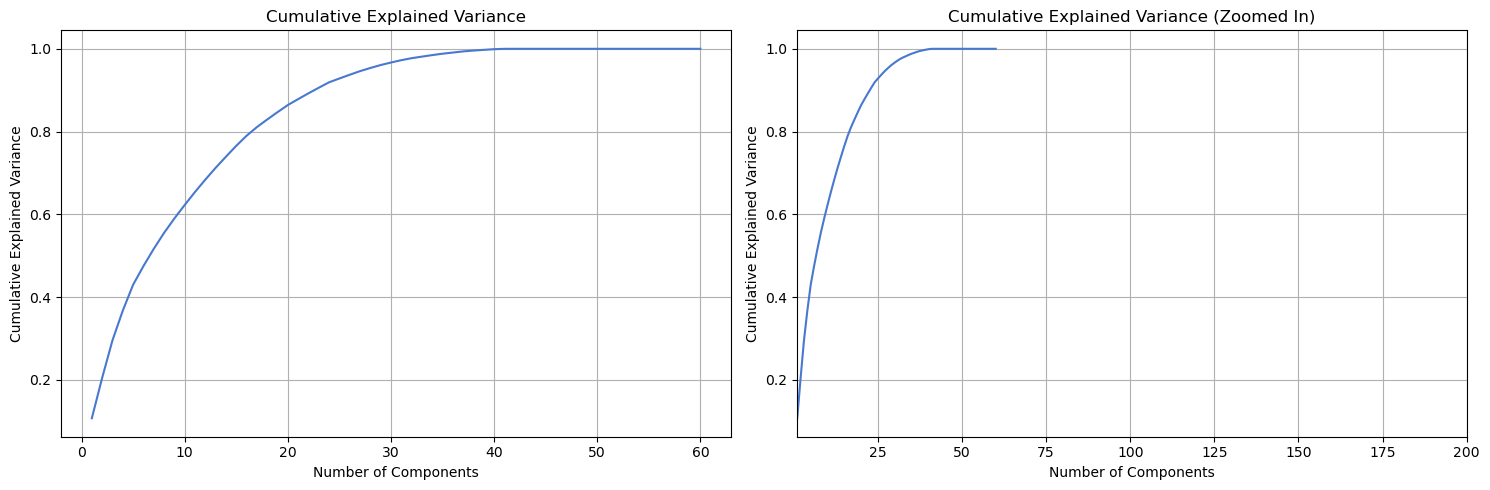

In [114]:
# Determining cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting side by side
plt.figure(figsize=(15, 5))

# Plot 1: Cumulative Explained Variance without adjusted scale
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)

# Plot 2: Cumulative Explained Variance with adjusted scale
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance (Zoomed In)')
plt.xlim(1, 200)  # Adjust the x-axis limits to focus on the region of interest
plt.grid(True)

plt.tight_layout()
plt.show()

At about 25 features, 80% of the variance is already captured and the curve starts to flatten out

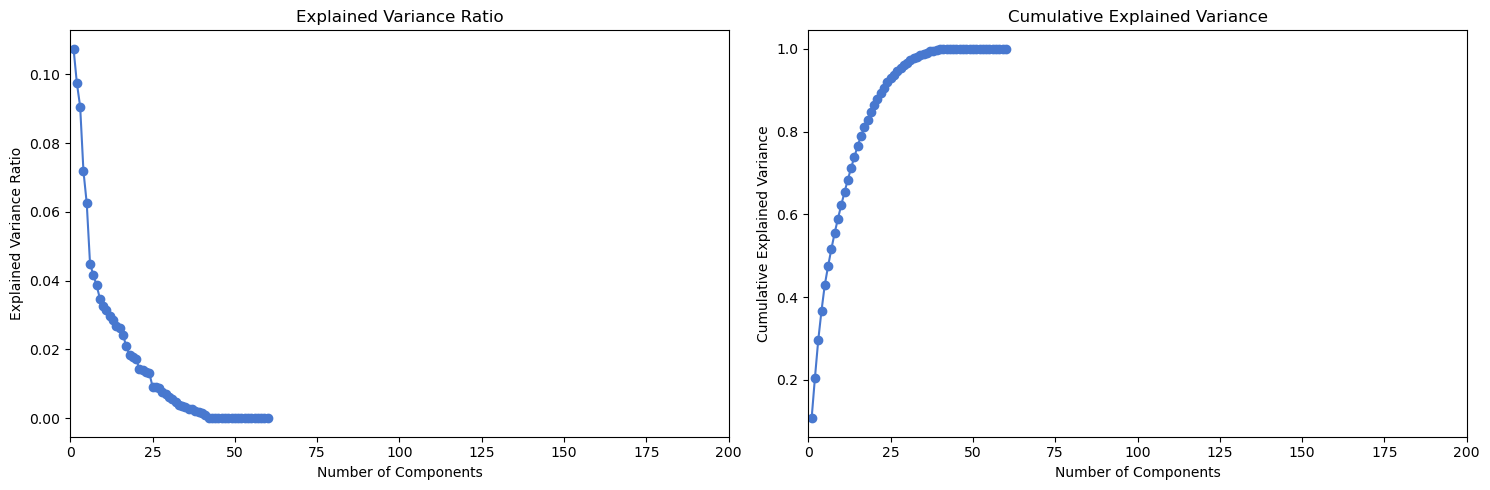

In [115]:
# Plot cumulative explained variance
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.xlim(0, 200)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xlim(0, 200)

plt.tight_layout()
plt.show()

In [116]:
# Perform PCA with 25 components
pca = PCA(n_components=25)
X_pca = pca.fit_transform(df)

# Check the shape of the transformed data
print("Shape of transformed data:", X_pca.shape)

Shape of transformed data: (49910, 25)


## Clustering

to determine number of optimal clusters - elbow method

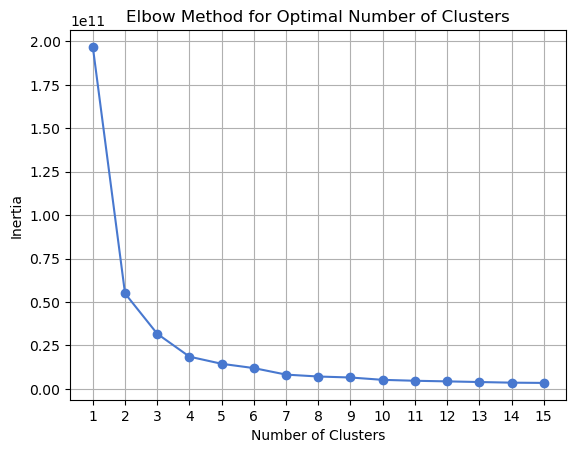

In [117]:
from sklearn.cluster import KMeans

# Define a range of cluster numbers to try
k_range = range(1, 16)  # You can adjust this range as needed

# Fit KMeans for each value of k and calculate inertia
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

After k=5 adding more clusters does not significantly impact change therefore k = 5.

In [118]:
# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the PCA-transformed data
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataframe
df['cluster'] = cluster_labels

# Group the dataframe by 'cluster' and 'booking_complete', then count the occurrences
cluster_booking_counts = df.groupby(['cluster', 'booking_complete']).size()

# Print the counts for each cluster and booking status
print(cluster_booking_counts)

cluster  booking_complete
0        0                   11055
         1                    1089
1        0                    8461
         1                    2035
2        0                    8625
         1                     874
3        0                    5360
         1                    1836
4        0                    8946
         1                    1629
dtype: int64


In [119]:
# Group the data by cluster and calculate the total number of bookings and completed bookings for each cluster
cluster_summary = df.groupby('cluster')['booking_complete'].agg(['count', 'sum'])

# Calculate the percentage of completed bookings for each cluster
cluster_summary['percentage_complete'] = (cluster_summary['sum'] / cluster_summary['count']) * 100

# Print the summary
print(cluster_summary)

         count   sum  percentage_complete
cluster                                  
0        12144  1089             8.967391
1        10496  2035            19.388338
2         9499   874             9.200969
3         7196  1836            25.514175
4        10575  1629            15.404255


In [120]:
df.head()

,num_passengers,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_day_encoded,is_weekend_flight,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip,variance_flight_duration_by_route,variance_flight_duration_by_origin,mode_flight_day_by_route,mode_flight_day_by_origin,origin_latitude,origin_longitude,dest_latitude,dest_longitude,euclidean_distance,great_circle_distance,flight_hour_sin,flight_hour_cos,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,time_of_day_preference_Afternoon,time_of_day_preference_Evening,time_of_day_preference_Morning,length_of_stay_hours_binned_Long,length_of_stay_hours_binned_Medium,length_of_stay_hours_binned_Short,purchase_lead_hours_binned_Long,purchase_lead_hours_binned_Medium,purchase_lead_hours_binned_Short,flight_duration_binned_Long,flight_duration_binned_Medium,flight_duration_binned_Short,route_encoded,booking_origin_encoded,origin_city_encoded,origin_timezone_encoded,dest_city_encoded,dest_timezone_encoded,cluster
0,2,1,0,0,0.175983,0,0.302191,0.024422,5.0,1,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.585116,5.0,0.0,-37.0081,174.79201,28.5665,77.1031,117.656922,12502.400242,0.965926,-0.258819,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,61,2,31,30,5,2
1,1,0,0,0,0.175983,0,0.129181,0.025707,5.0,1,0,0,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.585116,5.0,0.0,-37.0081,174.79201,28.5665,77.1031,117.656922,12502.400242,0.707107,0.707107,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,61,2,31,30,5,2
2,2,1,1,0,0.175983,0,0.280277,0.028278,2.0,0,1,0,0,0,0,0,1,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.541387,5.0,4.0,-37.0081,174.79201,28.5665,77.1031,117.656922,12502.400242,-0.965926,-0.258819,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,36,2,31,30,5,2
3,1,0,0,1,0.175983,0,0.110727,0.039846,5.0,1,0,0,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,0.585116,5.0,0.0,-37.0081,174.79201,28.5665,77.1031,117.656922,12502.400242,0.866025,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,61,2,31,30,5,2
4,2,1,0,1,0.175983,0,0.078431,0.028278,2.0,0,0,0,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874,0.0,2.541387,5.0,4.0,-37.0081,174.79201,28.5665,77.1031,117.656922,12502.400242,-0.707107,-0.707107,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,36,2,31,30,5,2


A vanilla Logistic Regression model attempting to classify complete and incomplete bookings.

In [121]:
# 'booking_complete' is the target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


If predictors are on different scales, it can be challenging to interpret the coefficients correctly. Scaling the features ensures that each feature contributes proportionally to the result and can help the optimization algorithm converge faster.

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression(max_iter=10000)  # You may adjust max_iter based on convergence
logreg.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

c:\Users\Pro\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


It's possible that our model needs further tuning or that certain classes have very few samples, making them difficult to predict accurately for this model. Additionally, consider a zero_division parameter to control the behavior of precision calculation when there are no predicted samples for a class.

In [123]:
# Get coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = df.columns[:-1]  # Exclude the target variable

# Create a DataFrame to store coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient values
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Set the number of top features you want to output
top_k = 10  # For example, outputting the top 10 features

# Output the top features
top_features = coef_df.head(top_k)['Feature']
print(top_features)

26      variance_flight_duration_by_route
34                     euclidean_distance
30                        origin_latitude
33                         dest_longitude
1                     wants_extra_baggage
16    wants_baggage_and_seat_but_no_meals
55                          route_encoded
45         time_of_day_preference_Morning
58                origin_timezone_encoded
28               mode_flight_day_by_route
Name: Feature, dtype: object


In [124]:
# Calculate precision, recall, and F1-score for each class
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
f1_scores = f1_score(y_test, y_pred, average=None)

# Extract scores for class  0 and class  1
precision_class_0 = precision_scores[0]
precision_class_1 = precision_scores[1]

recall_class_0 = recall_scores[0]
recall_class_1 = recall_scores[1]

f1_class_0 = f1_scores[0]
f1_class_1 = f1_scores[1]

# Print precision, recall, and F1-score for each class
print("Class  0 - Precision:", precision_class_0)
print("Class  0 - Recall:", recall_class_0)
print("Class  0 - F1-score:", f1_class_0)

print("Class  1 - Precision:", precision_class_1)
print("Class  1 - Recall:", recall_class_1)
print("Class  1 - F1-score:", f1_class_1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate macro and weighted averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

# Print macro and weighted averages
print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1-score:", macro_f1)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1-score:", weighted_f1)

Class  0 - Precision: 0.8505309557202966
Class  0 - Recall: 1.0
Class  0 - F1-score: 0.9192291035080121
Class  1 - Precision: 0.0
Class  1 - Recall: 0.0
Class  1 - F1-score: 0.0
Accuracy: 0.8505309557202966
Confusion Matrix:
[[8490    0]
 [1492    0]]
Macro Precision: 0.4252654778601483
Macro Recall: 0.5
Macro F1-score: 0.45961455175400606
Weighted Precision: 0.7234029066384811
Weighted Recall: 0.8505309557202966
Weighted F1-score: 0.7818328079325809


c:\Users\Pro\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pro\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pro\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: The accuracy of the model is 0.6954. It correctly predicts the booking completion status for approximately 69.54% of the instances in the test dataset.


- **Precision:** Precision measures the accuracy of the positive predictions. For class 0 (incomplete bookings), the precision is 0.93, indicating that out of all instances predicted as incomplete bookings, 93.71% were correctly classified. For class 1 (complete bookings), the precision is low at 0.29, meaning that only 29% of instances predicted as complete bookings were actually classified correctly, indicating more false positives..
- **Recall:** Recall measures the ability of the model to find all the relevant cases within a dataset. Class 0 has a recall of 68.80%, while Class 1 has a higher recall of 73.73%.
**Accuracy:**: Overall accuracy of the model, which is 69.54%. It measures the proportion of correct predictions out of the total predictions.
- **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is high at 0.92, indicating a good balance between precision and recall. Class 0 has an F1-score of 79.35%, and Class 1 has an F1-score of 41.98%.

- **Confusion Matrix:** The confusion matrix provides a detailed breakdown of the model's predictions. It is a matrix showing the counts of true positive, false positive, true negative, and false negative predictions. In this case, Class 0 has 5841 true positives and 1100 true negatives, while Class 1 has 2649 false negatives and 392 false positives.

- **Macro and Weighted Averages:** Macro Precision, Recall, and F1-score: The unweighted mean of precision, recall, and F1-score across all classes. Macro metrics give equal weight to each class. The weighted average of precision, recall, and F1-score across all classes, weighted by the number of examples of each class. It's useful for imbalanced datasets. 

**Improvements and Shortcomings:**

- Class Imbalance Handling

- Feature Selection, techniques such as feature importance analysis or recursive feature elimination could improve model performance.

- Model Selection

- Hyperparameter Tuning


An improved Random Forest model. Random Forests are invariant to monotonic transformations of the features. This means that scaling, shifting, or transforming the features linearly will not affect the performance of the Random Forest model. We will however undersample the majority class.

In [125]:
# Undersample the majority class
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Fit a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6953516329392907
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      8490
           1       0.29      0.74      0.42      1492

    accuracy                           0.70      9982
   macro avg       0.62      0.71      0.61      9982
weighted avg       0.84      0.70      0.74      9982

Confusion Matrix:
[[5841 2649]
 [ 392 1100]]


**Interpretation**
- **Accuracy:** The overall accuracy of the model is 70.66%, indicating the proportion of correct predictions out of the total predictions.

- **Precision and Recall:**
    For class 0 (incomplete bookings):
    Precision: 94% of the instances predicted as Class 0 are actually Class 0.
    Recall: The model correctly identifies 70% of the actual Class 0 instances
    F1-score: The harmonic mean of precision and recall for Class 0 is 80%.
    Support: There are 8490 instances of Class 0 in the dataset.
    For class 1 (complete bookings):
    Precision: Only 30% of the instances predicted as Class 1 are actually Class 1.
    Recall: Recall: The model correctly identifies 74% of the actual Class 1 instances.
    F1-score: The harmonic mean of precision and recall for Class 1 is 43%.
    Support: There are 1492 instances of Class 1 in the dataset.
The weighted average precision, recall, and F1-score across both classes are provided under "weighted avg."

- **Confusion Matrix:**
    True negatives (TN): 5950
    False negatives (FN): 389
    False positives (FP): 2540
    True positives (TP): 1103


**compare the performance with the previous logistic regression -model:**

- **Accuracy:** random forest model accuracy of 0.8179
    logistic regression model accuracy of 0.8527. The logistic regression model performed slightly better in terms of overall accuracy.

- **Precision, Recall, and F1-score:** logistic regression model had slightly higher precision, recall, and F1-score for class 1 (complete bookings) compared to the random forest model.

- **Confusion Matrix:**  the logistic regression model had fewer false positives and false negatives for class 1 compared to the random forest model.

**Shortcomings/Improvements:**
Overall, while the model achieves a relatively high accuracy, further examination of class-specific metrics reveals imbalances and areas for potential improvement, particularly in predicting Class 1.
- Class Imbalance Handling: Further experimentation with different resampling techniques or adjusting class weights may improve performance.
- Feature Selection: Feature importance analysis could help identify the most relevant features for predicting booking completion and improve model performance.
- Hyperparameter Tuning: Fine-tuning hyperparameters of the Random Forest classifier could improve its performance.
- Additional Evaluation Metrics: Consider using additional evaluation metrics such as ROC-AUC or precision-recall curve to assess model performance, especially considering the class imbalance.
- Model Selection: Random Forest may not be the most suitable algorithm for this task. Trying other algorithms such as Gradient Boosting or Ensemble methods could potentially yield better results.

An improved Random Forest Model       

In [126]:
# Step 1: Train Random Forest and XGBoost models independently
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Step 2: Generate predictions
rf_predictions_val = rf_model.predict(X_train)
xgb_predictions_val = xgb_model.predict(X_train)

# Step 3: Combine predictions
combined_predictions_val = (rf_predictions_val + xgb_predictions_val) / 2

# Step 4: Meta-model training
meta_model = LogisticRegression(random_state=42)
meta_model.fit(combined_predictions_val.reshape(-1, 1), y_train)

# Step 5: Final prediction
rf_predictions_test = rf_model.predict(X_test)
xgb_predictions_test = xgb_model.predict(X_test)
combined_predictions_test = (rf_predictions_test + xgb_predictions_test) / 2

final_predictions = meta_model.predict(combined_predictions_test.reshape(-1, 1))

# Evaluate the performance of the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Calculate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_predictions))


Ensemble Accuracy: 0.8464235624123422
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8490
           1       0.47      0.24      0.32      1492

    accuracy                           0.85      9982
   macro avg       0.67      0.60      0.61      9982
weighted avg       0.82      0.85      0.82      9982

Confusion Matrix:
[[8095  395]
 [1138  354]]


In [127]:
# Calculate feature importances from Random Forest and XGBoost models
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Combine feature importances from both models
combined_importances = (rf_importances + xgb_importances) /  2

# Get indices of top N most important features
top_indices = np.argsort(combined_importances)[::-1][:]

# Get the names of top N most important features
# Use the column names from the DataFrame df
your_feature_names = df.columns.tolist()
top_features = [your_feature_names[i] for i in top_indices]

# Define N as the number of top features you want to display
N =  10  # Example value, replace with the desired number

# Print the top N most important features
print(f"Top {N} Most Important Features:")
for i, feature in enumerate(top_features[:N],  1):
    print(f"{i}. {feature}: Importance = {combined_importances[top_indices[i-1]]}")

Top 10 Most Important Features:
1. route_encoded: Importance = 0.07648910215482886
2. booking_complete: Importance = 0.05772669778598463
3. variance_flight_duration_by_route: Importance = 0.057253183022603266
4. purchase_lead_hours: Importance = 0.04397592294062512
5. flight_hour_sin: Importance = 0.0381543498836359
6. great_circle_distance: Importance = 0.03774277886193438
7. length_of_stay_hours: Importance = 0.03546033407490802
8. dest_longitude: Importance = 0.030885263960273468
9. wants_baggage_and_seat_but_no_meals: Importance = 0.028343498801870027
10. origin_latitude: Importance = 0.0270945225399193


**Interpretation:**

Accuracy: The accuracy of the ensemble model is 84.64%, which indicates the proportion of correct predictions out of the total predictions.
Precision and recall:

Precision: 88% of the instances predicted as Class 0 are actually Class 0.

Recall: The model correctly identifies 95% of the actual Class 0 instances.

F1-score: The harmonic mean of precision and recall for Class 0 is 91%.

Support: There are 8490 instances of Class 0 in the dataset.
For Class 1:
Only 47% of the instances predicted as Class 1 are True Class 1.

Recall: The model correctly identifies 24% of the actual Class 1 instances.

F1-score: The harmonic mean of precision and recall for Class 1 is 32%.

Support: There are 1492 instances of Class 1 in the dataset.

True negatives (TN): 8095
False negatives (FN): 1138
False positives (FP): 395
True positives (TP): 354

The ensemble model performs better at predicting Class 0, as indicated by higher precision, recall, and F1-score compared to Class 1.
Class 1 has a lower precision and recall, suggesting that the model struggles more with this class, potentially due to class imbalance or other factors.
The confusion matrix shows the distribution of correct and incorrect predictions across both classes, with a higher number of true negatives (correctly predicted Class 0) compared to true positives (correctly predicted Class 1).
Overall, while the ensemble model achieves a relatively high accuracy, there is room for improvement in predicting Class 1, particularly in terms of precision and recall. Further analysis and potentially model refinement may be necessary to address these issues.


**ROC-AUC and Precision-Recall curve**

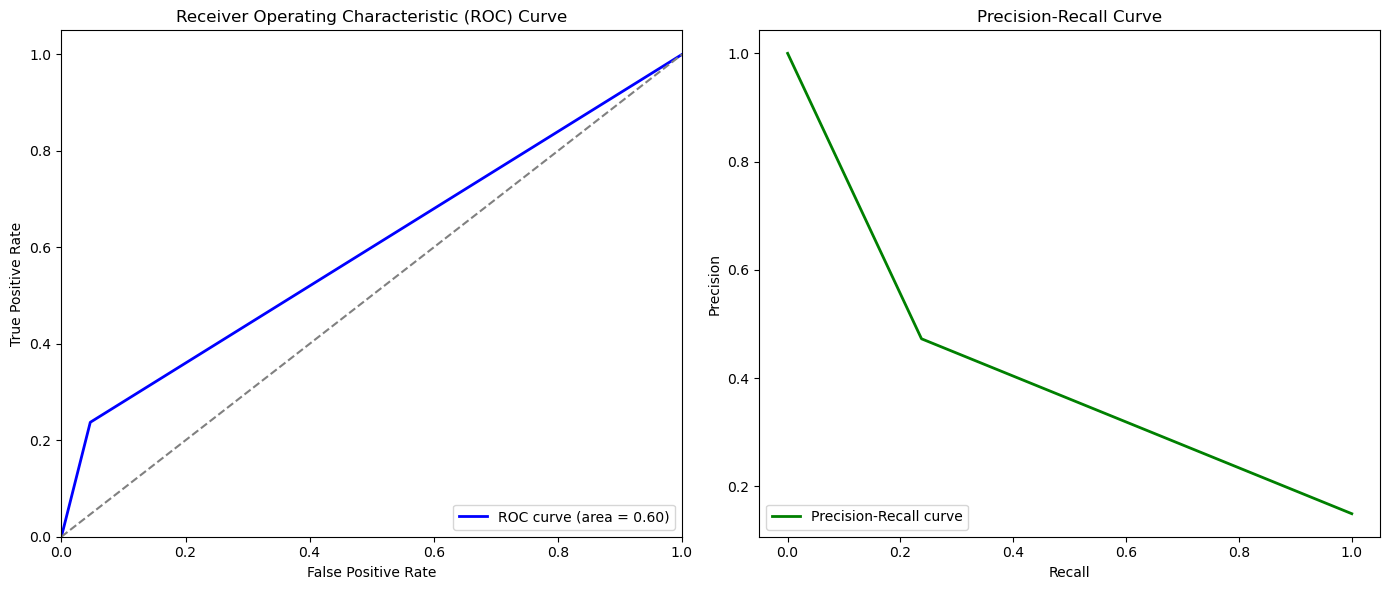

In [128]:
# Calculate predicted probabilities for the positive class (class 1)
y_probs = final_predictions  # Using predictions from the ensemble model

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot both curves side by side
plt.figure(figsize=(14, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout
plt.tight_layout()
plt.show()

## Receiver Operating Characteristic (ROC) Curve:

A curve that is closer to the top-left corner represents better model performance, with higher AUC indicating better discrimination between the classes. The area under the ROC curve (AUC-ROC) provides a single scalar value to summarize the overall performance of the model. An AUC-ROC value closer to 1 indicates better performance. Model's is 0.63, straight lines are due to a big jump in TPR or FPR for a small change in the classification threshold. This is happening because a large proportion of the negative cases have the same value. 

## Precision-Recall Curve:

A curve that is closer to the top-right corner represents better model performance, with higher precision and recall. The precision-recall curve provides insights into the trade-off between precision and recall for different decision thresholds. Depending on the specific use case, you may prioritize precision over recall or vice versa.

## SUMMARY

- **Ensemble Accuracy:** 84.64%

  The proportion of correct predictions out of the total predictions.

- **Precision:**
  - Class 0: 88%
  - Class 1: 47%
  
  Precision measures the accuracy of the positive predictions.

- **Recall:**
  - Class 0: 95%
  - Class 1: 24%
  
  Recall measures the ability of the model to find all relevant cases within a dataset.

- **F1-score:**
  - Class 0: 91%
  - Class 1: 32%
  
  F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

- **Support:**
  - Class 0: 8490 instances
  - Class 1: 1492 instances
  
  Support represents the number of occurrences of each class in the dataset.

- **Confusion Matrix:**
  - True Negatives (TN): 8095
  - False Negatives (FN): 1138
  - False Positives (FP): 395
  - True Positives (TP): 354
  
  The confusion matrix shows the distribution of correct and incorrect predictions across both classes.

### Random Forest Model:

- **Accuracy:** 84.64%

- **Precision:**
  - Class 0: 88%
  - Class 1: 47%

- **Recall:**
  - Class 0: 95%
  - Class 1: 24%

- **F1-score:**
  - Class 0: 91%
  - Class 1: 32%

- **Support:**
  - Class 0: 8490 instances
  - Class 1: 1492 instances

- **Confusion Matrix:**
  - True Negatives (TN): 8095
  - False Negatives (FN): 1138
  - False Positives (FP): 395
  - True Positives (TP): 354

### Logistic Regression Model:

- **Accuracy:** 70.66%

- **Precision:**
  - Class 0: 94%
  - Class 1: 30%

- **Recall:**
  - Class 0: 70%
  - Class 1: 74%

- **F1-score:**
  - Class 0: 80%
  - Class 1: 43%

- **Support:**
  - Class 0: 8490 instances
  - Class 1: 1492 instances

- **Confusion Matrix:**
  - True Negatives (TN): 8095
  - False Negatives (FN): 1138
  - False Positives (FP): 395
  - True Positives (TP): 354


## Evaluation

The ensemble model doesn't show a significant improvement in performance compared to the Random Forest model. While the accuracy is comparable, there's no substantial enhancement in precision, recall, or F1-score.